## Template

This is the code from vege classifier

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras import layers

In [19]:
train_data_path = "./Fruits_Vegetables/train"
test_data_path = "./Fruits_Vegetables/test"
valid_data_path = "./Fruits_Vegetables/validation"

In [20]:
img_width = 180
img_height = 180

In [21]:
train_data = keras.utils.image_dataset_from_directory(
    train_data_path,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=False
)

valid_data = keras.utils.image_dataset_from_directory(
    valid_data_path,
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=False
)

test_data = keras.utils.image_dataset_from_directory(
    test_data_path,
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=False
)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [30]:
classes = train_data.class_names

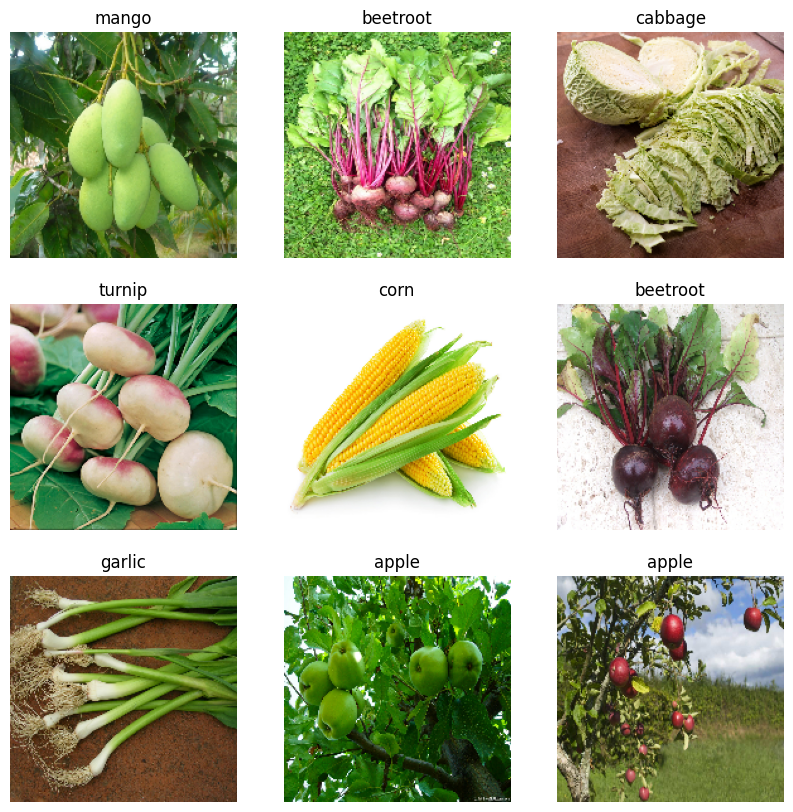

In [23]:
plt.figure(figsize=(10, 10))

for image, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')

In [31]:
from keras.models import Sequential

model = Sequential([
    layers.Rescaling(1/255),
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dropout(0.2),
    
    layers.Dense(128),
    layers.Dense(len(classes))
])

In [32]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [33]:
epoch = 25
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epoch,
    batch_size=32,
    verbose=1
)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 156ms/step - accuracy: 0.0549 - loss: 3.7351 - val_accuracy: 0.3276 - val_loss: 2.4461
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.2441 - loss: 2.6395 - val_accuracy: 0.5299 - val_loss: 1.6790
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.3795 - loss: 2.1182 - val_accuracy: 0.6553 - val_loss: 1.1873
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.5166 - loss: 1.6673 - val_accuracy: 0.8205 - val_loss: 0.7430
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.6433 - loss: 1.2089 - val_accuracy: 0.8376 - val_loss: 0.6274
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.7625 - loss: 0.8255 - val_accuracy: 0.9117 - val_loss: 0.4054
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - accuracy: 0.8548 - loss: 0.5239 - val_accuracy: 0.9145 - val_loss: 0.4088
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.8919 - loss: 0.4097 - val_accu

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,979,854 (45.70 MB)

 Trainable params: 3,993,284 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,986,570 (30.47 MB)

Text(0.5, 1.0, 'Loss')

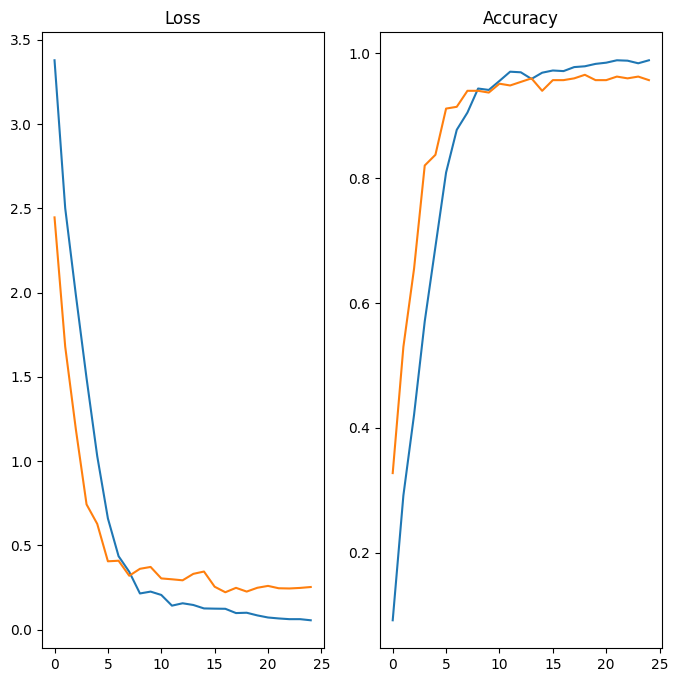

In [36]:
epoch_range = range(epoch)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history["loss"], label="Training Loss")
plt.plot(epoch_range, history.history["val_loss"], label="Validation Loss")
plt.title("Loss")

In [56]:
img = './kiwi.png'
img = tf.keras.utils.load_img(img, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(img)
img_bat = tf.expand_dims(img_arr, 0)

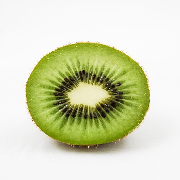

In [57]:
img

In [58]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [59]:
score = tf.nn.softmax(predict)
print(classes[np.argmax(score)])
print(np.max(score) * 100)
print(score)

kiwi
62.64047622680664
tf.Tensor(
[[3.1106018e-03 1.9804412e-01 1.9664755e-07 7.1699054e-05 1.0432071e-03
  1.6300578e-04 5.8504860e-08 1.2879958e-04 2.5962797e-04 1.2457544e-04
  6.0354005e-06 2.1058766e-05 1.4404039e-05 1.0675184e-02 2.1572053e-02
  1.8667828e-04 6.2640476e-01 2.8732058e-03 3.4572759e-06 2.2501420e-04
  6.3177715e-05 7.6867343e-04 4.8807301e-03 4.4267075e-03 1.2094730e-01
  3.3472348e-05 5.9046552e-06 5.0307841e-05 2.6246201e-04 2.3055067e-03
  1.0832233e-04 9.8715466e-04 7.0477414e-05 3.2659376e-05 1.4070437e-05
  1.1531668e-04]], shape=(1, 36), dtype=float32)


In [61]:
model.save('Vege_classifier.keras')

from keras.models import load_model

saved_model = load_model('./Vege_classifier.keras')
saved_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,979,854 (45.70 MB)

 Trainable params: 3,993,284 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,986,570 (30.47 MB)